Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[20  0]
 [ 0 10]]


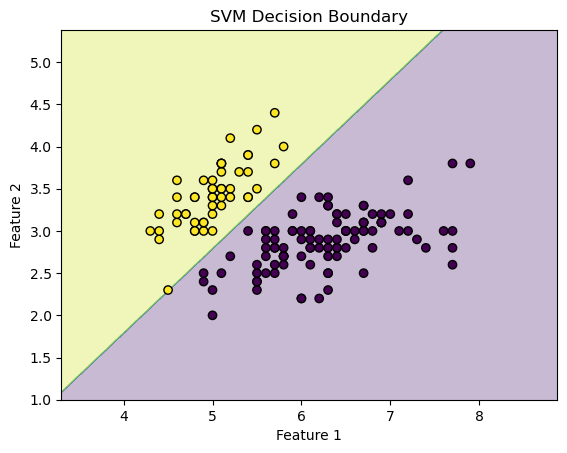

In [1]:
# Import necessary libraries

import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Load dataset (Iris dataset for classification)

iris = datasets.load_iris()

X, y = iris.data[:, :2], iris.target  # Using only first two features for visualization



# Convert multi-class to binary classification (Setosa vs Non-Setosa)

y = (y == 0).astype(int)



# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Create and train SVM model

svm_model = SVC(kernel='linear')  # Using linear kernel

svm_model.fit(X_train, y_train)



# Predict on test data

y_pred = svm_model.predict(X_test)



# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



# Visualizing decision boundary

def plot_svm_decision_boundary(model, X, y):

    h = .02  # Step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    

    plt.contourf(xx, yy, Z, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

    plt.xlabel('Feature 1')

    plt.ylabel('Feature 2')

    plt.title('SVM Decision Boundary')

    plt.show()



# Plot decision boundary

plot_svm_decision_boundary(svm_model, X, y)